<a href="https://colab.research.google.com/github/chintanrout/Mario_AI/blob/main/Mario_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setup Mario**

In [5]:
!pip install stable-baselines3[extra]

     |████████████████████████████████| 174 kB 9.3 MB/s 


In [6]:
!pip install gym_super_mario_bros==7.3.0 nes_py

     |████████████████████████████████| 198 kB 6.9 MB/s 
     |████████████████████████████████| 76 kB 5.4 MB/s 
  Created wheel for nes-py: filename=nes_py-8.1.8-cp37-cp37m-linux_x86_64.whl size=433997 sha256=6390902e3741728c26ea6132f072445a0ad2d3cff567891402205f53853a530d
  Stored in directory: /root/.cache/pip/wheels/f2/05/1f/608f15ab43187096eb5f3087506419c2d9772e97000f3ba025
Successfully built nes-py


In [1]:
import matplotlib.pyplot as plt

In [2]:
from google.colab.patches import cv2_imshow

In [3]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [7]:
#Import the game
import gym_super_mario_bros 
#Import the joypad wrapper
from nes_py.wrappers import JoypadSpace
#Import simplified controls 
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

**Note: We need to that for building an AI for game we need to keep it as simple as possible. The more complex it is the harder it is going to be for the AI to learn**

In [8]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [9]:
#Here we have simplified down our complexity to seven actions that Mario can take


In [10]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0') #This is basically setting up the environment or the game that is 
#being setup in order for us to play our game
#Here we are setting up the classic simple mario game


In [11]:
env.action_space
#This indicates the number of actions our character can play in the game t
#Which will lead to countless hours inorder for our game to be able to play 
#That is why it is important to make sure to reduce the number of actions

Discrete(256)

In [12]:
env = JoypadSpace(env, SIMPLE_MOVEMENT)
#we are wrapping our game with the simple actions that we have gotten

In [13]:
env.action_space
#Now that we have wrapped it with our simple joystick we have reduced the number of actions and hence the complexity

Discrete(7)

In [14]:
env.observation_space.shape
#This indicates what we will be getting back from our game
#Which is essentially a frame from the game

(240, 256, 3)

Now to essentially start off we are just gonna loop through and perform some actions

In [15]:
'''#Create a flag - restart or not
done = True #start a game to begin with 
for step in range(100000):#looping through every single frame of the game
    if done:
        env.reset()#Restart the game 
    state, reward, done, info = env.step(env.action_space.sample())#env.step will allow us to passing an action to the game 
    #it could be jump move, right left,etc. 
    #env.action_space.sample will just take random actions
    #With taking a step we are gonne see our state:(explained later)
    #reward(whether we got a coin or not)
    #done(whether we are dead or not)
    #info(some info)
    env.render()#Show the game on the screen
#CLose the game
env.close
'''

'#Create a flag - restart or not\ndone = True #start a game to begin with \nfor step in range(100000):#looping through every single frame of the game\n    if done:\n        env.reset()#Restart the game \n    state, reward, done, info = env.step(env.action_space.sample())#env.step will allow us to passing an action to the game \n    #it could be jump move, right left,etc. \n    #env.action_space.sample will just take random actions\n    #With taking a step we are gonne see our state:(explained later)\n    #reward(whether we got a coin or not)\n    #done(whether we are dead or not)\n    #info(some info)\n    env.render()#Show the game on the screen\n#CLose the game\nenv.close\n'

In [16]:
state = env.reset()

In [17]:
state#The state is basically the frame from the game, we will basically give this coloured image to an
#AI later on to learn how to play mario

array([[[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       ...,

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [228,  92,  16],
        [  0,   0,   0]],

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [228,  92,  16]]

In [18]:
env.step(1)

(array([[[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        ...,
 
        [[240, 208, 176],
         [228,  92,  16],
         [228,  92,  16],
         ...,
         [228,  92,  16],
         [228,  92,  16],
         [  0,   0,   0]],
 
        [[240, 208, 176],
         [228,  92,  16],
         [228,  92,  16],
         ...,
         [228,  92,  16],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[228,  92,  16],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
  

In [19]:
env.step(1)[0]#Now this returns a new state after we have done an action 
#for example if mario jumps then that frame will be depicted by the given 
#state values below

array([[[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       ...,

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [228,  92,  16],
        [  0,   0,   0]],

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [228,  92,  16]]

In [20]:
env.step(1)[1]#This is basically if we get any reward or not
#that the step we took gave us any point or not, this is crucial for reinforcement learning

0

In [21]:
#The fact that its showing 0 means that mario got stuck somewhere 
#Eventually we need to train our AI so that it can maximize the reward points

In [22]:
env.step(1)[3]#This bascially given us the info of our character and what we get back

{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 0,
 'stage': 1,
 'status': 'small',
 'time': 400,
 'world': 1,
 'x_pos': 40,
 'x_pos_screen': 40,
 'y_pos': 79}

**Preprocess Environment**

Its important to note that before we preprocess the Data before we start applying our AI. As we know the basic rule Rubbish Data = Rubbish Output.
We will apply 2 key preprocessing steps:
1. Gray Scaling 
2. Frame Stacking
->Gray Scaling: The color frame have 3 times as much pixels to process but cutting it down to GrayScale will lead to decreasing the amount of data we need to process. Which will result in a Faster AI.

-> Frame Stacking: It will help us get the context required. This is done to determine the trajectory of both Mario and other characters present in the game.


In [23]:
#!pip3 install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [24]:
# Import Framestacker wrapper and grayscaling wrapper
from gym.wrappers import FrameStack, GrayScaleObservation
#->FrameStacking will capture all the previous frames from when Mario starts playing
#Like Mentioned this is going to help the AI learn where the characters are are how they move

#Grayscale will convert our coloured game into a grayscale version we will only have to deal with 
#33.33percent of data

#Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
#When we start working on our AI model we need to be able to pass all our data and for doing that 
#we need to vectorize our data and thats why we use the above functions. 
#VecFrameStack will will vectorize all our frames and DummyVecEnv will wrap our environment in a vector.

# Import Matplotlib 
#This will show the impact of frame stacking 
from matplotlib import pyplot as plt


In [25]:
#After installing all the basic stuff we will start wrapping our games with the libraries

In [26]:
#1. Create the base environment 
env = gym_super_mario_bros.make('SuperMarioBros-v0') 
#2. Simplify the control
env = JoypadSpace(env, SIMPLE_MOVEMENT)



In [27]:
#Before we Gray scale lets look at a single Frame from the game 
state= env.reset()
state.shape

(240, 256, 3)

In [28]:
240*256*3

184320

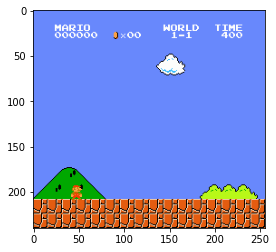

In [29]:
#use matplotlib to show the image
plt.imshow(state)

In [30]:
#3. Grayscale the environment
env = GrayScaleObservation(env, keep_dim= True)
#if we do keep_dim as False it will get rid of the last channel 
#in state.shape which is necessary if we want to do framstacking

In [31]:
#After Gray scale lets look at a single Frame from the game 
state= env.reset()
state.shape

(240, 256, 1)

In [32]:
240*256*1

61440

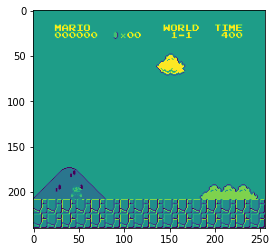

In [33]:
#use matplotlib to show the image
plt.imshow(state[:,:,0])

This has effectively decreased the amount of data we need to process from 184320 we have come down to 61440. That is the importance of grayscale.

In [34]:
#4. Wrap it inside a dummy(stable baselines vector environment
env = DummyVecEnv([lambda: env])

In [35]:
state= env.reset()

In [36]:
state.shape
#As we can see below a new dimension has been added 

(1, 240, 256, 1)

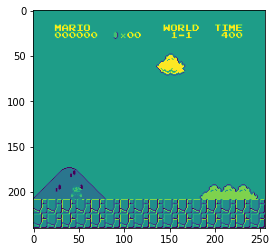

In [37]:
#If we try to plot the image with plt.imshow(state) it will throw an error.
plt.imshow(state[0,:,:,0])

In [38]:
#5. Stack the frames
env = VecFrameStack(env, 4, channels_order = 'last')
#We are passing through our environment we choose how many frames we are going for
#In this case its 4 and then we specify where our channel order is (in state.shape) which is in the last.


In [39]:
state= env.reset()
state.shape

(1, 240, 256, 4)

The reason its showing 4 is because we have gone ahead and stacked 4 images on top of each other

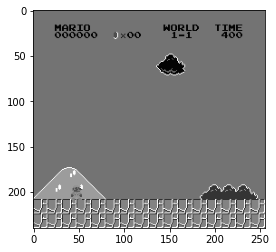

In [40]:
plt.imshow(state[0,:,:])

In [41]:
state,reward, done, info = env.step([env.action_space.sample()])

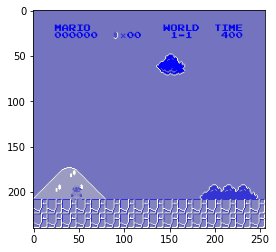

In [42]:
plt.imshow(state[0,:,:])

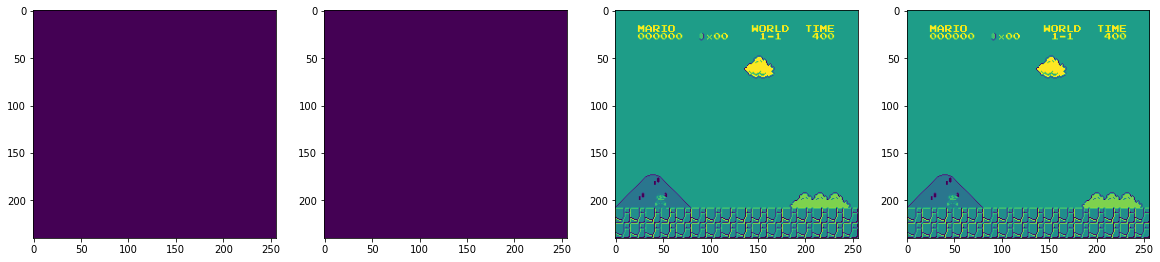

In [43]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

After running it a bunch of times you can see our character that its jumping
This shows that now our AI is capable of retaining memory which will help us build the model

**Train the Model**

*Now a few quick Notes of what we are about to do. We are going to use Reinforcement learning in order to train our AI. The easiest way to remember it is using the acronym AREA 51.
A- Agent
R- Reward
E- Environment
A- Action
In our case our Agent is MARIO who can run/jump inside the environment and based on the Action that he takes he is rewarded. AI controlling MARIO learns what specific actions to take in order to maximize the reward for MARIO. The specific reinforcement learning Algorithm we are going for is PPO:Proximate Policy Optimization.

In [44]:
#import some dependencies 
#import os for file path management 
import os
#import PPO for algos
from stable_baselines3 import PPO
#Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [45]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [46]:
#The code abive is basically saving our Model. It is being saved after every 10K steps

In [47]:
#Set up our directories where we will be saving our model and different logs
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [48]:
# setup model saving callback
callback= TrainAndLoggingCallback(check_freq=10000, save_path = CHECKPOINT_DIR)

In [49]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

Using cpu device
Wrapping the env in a VecTransposeImage.


In [50]:
#By passing through CNN policy we are making use of the CNN neural network which is specifically highly efficient 
#for processing images

In [51]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/PPO_1


/usr/local/lib/python3.7/dist-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 38  |
|    iterations      | 1   |
|    time_elapsed    | 13  |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 8             |
|    iterations           | 2             |
|    time_elapsed         | 121           |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 1.4658202e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.00219      |
|    learning_rate        | 1e-06         |
|    loss                 | 214           |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.000208     |
|    value_loss           | 559           |
-------------------------------------------
-----

In [52]:
model.save('thisisatestmodel')

**Testing**

In [55]:
# Load model
model = PPO.load('train/best_model_100000')

In [57]:
state = env.reset()

In [60]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    plt.imshow(env.render(mode='rgb_array'))

/usr/local/lib/python3.7/dist-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f11a3e8c0e0> (for post_execute):


KeyboardInterrupt: ignored